In [157]:
# Dependencies
from citipy import citipy as ct
import json
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
from config import weather_key

In [111]:
coords = list(ct.WORLD_CITIES_DICT.keys())
city_list = list(set([ct.nearest_city(coords[index][0],coords[index][1]).city_name for index in range(len(coords))]))

In [133]:
weather_data = pd.DataFrame(columns=['city','lng','lat','temp','hum','cld','wnd'])
for city in random.sample(city_list,700):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_key}"
    response = requests.get(url).json()
    try:
        weather_data = weather_data.append({'city': city, 
                                        'lng': response['coord']['lon'],
                                        'lat': response['coord']['lat'], 
                                        'temp': response['main']['temp'],
                                        'hum': response['main']['humidity'],
                                        'cld': response['clouds']['all'],
                                        'wnd': response['wind']['speed']},ignore_index=True)
        sample_counter += 1
    except KeyError:
        print(f"An error occured with the information for city: {city}")
print(f"Samples pulled: {len(weather_data)}")
weather_data.head()

An error occured with the information for city: qurunbaliyah
An error occured with the information for city: addi ugri
An error occured with the information for city: jiddah
An error occured with the information for city: noybera
An error occured with the information for city: ripailles
An error occured with the information for city: sempeter
An error occured with the information for city: bishna
An error occured with the information for city: tazirkah
An error occured with the information for city: urasoe
An error occured with the information for city: poliyiros
An error occured with the information for city: koropion
An error occured with the information for city: bolshiye dvory
An error occured with the information for city: kawana waters
An error occured with the information for city: tigwi
An error occured with the information for city: banog
An error occured with the information for city: atarasquillo
An error occured with the information for city: ilka
An error occured with the 

,city,lng,lat,temp,hum,cld,wnd
0,buftea,25.9489,44.5614,43.11,93,90,6.91
1,george town,100.3354,5.4112,88.34,70,40,2.30
2,erezee,5.5500,50.3000,31.69,86,0,5.75
3,haebaru,127.8719,26.3369,76.39,53,75,14.97
4,liwonde,35.2035,-15.0506,68.07,85,43,0.65


In [205]:
weather_data[['hum','cld']] = weather_data[['hum','cld']].astype(float)

n_hemi = weather_data.loc[weather_data.lat>=0]
s_hemi = weather_data.loc[weather_data.lat<0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    652 non-null    object 
 1   lng     652 non-null    float64
 2   lat     652 non-null    float64
 3   temp    652 non-null    float64
 4   hum     652 non-null    float64
 5   cld     652 non-null    float64
 6   wnd     652 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.8+ KB


## Temperature

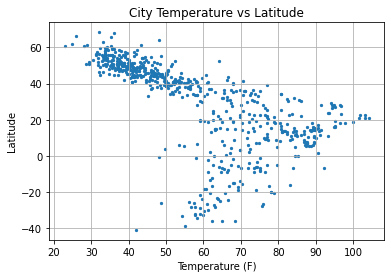

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current temperature.


In [154]:
plt.scatter(weather_data.temp,weather_data.lat,s=5)
plt.title('City Temperature vs Latitude')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current temperature.")

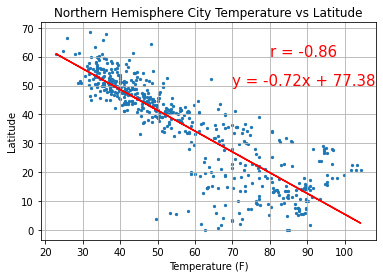

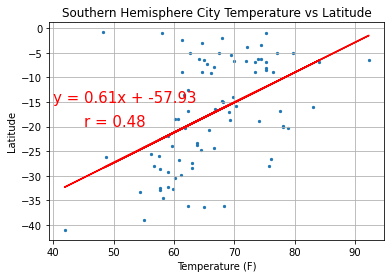

In [194]:
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.temp,n_hemi.lat)
reg_line = slope*n_hemi.temp + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.temp,reg_line,color='r')
plt.annotate(eq_line,(70,50),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(80,60),color='r',fontsize=15)

plt.scatter(n_hemi.temp,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Temperature vs Latitude')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.temp,s_hemi.lat)
reg_line = slope*s_hemi.temp + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.temp,reg_line,color='r')
plt.annotate(eq_line,(40,-15),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(45,-20),color='r',fontsize=15)

plt.scatter(s_hemi.temp,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Temperature vs Latitude')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

The linear regression reveals that in the northern hemisphere there is a moderate correlation (r = -0.86, subject to change depending on sample) between temperature and distance ot the equator. The closer a city is, the more likely it is to have higher temperatures.

Interestingly enough, the correlation is not as strong in the southern hemisphere (r = 0.48, subject to change). There could be a number of reasons why this is so. For one, the sample size is noticeably smaller in the southern hemisphere. the correlation may change and become stronger if there is a larger sample size in the southern hemisphere.

## Humidity

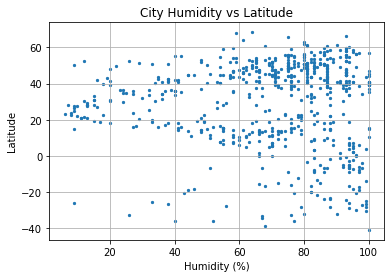

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current humidity.


In [195]:
plt.scatter(weather_data.hum,weather_data.lat,s=5)
plt.title('City Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current humidity.")

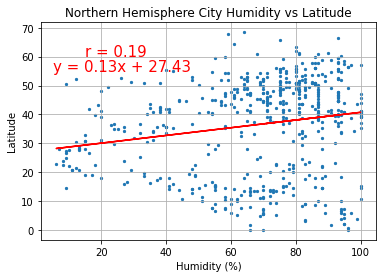

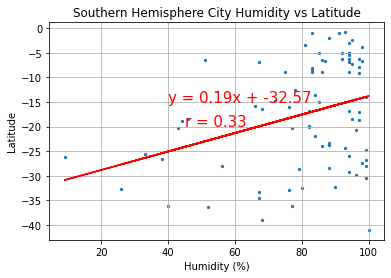

In [208]:
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.hum,n_hemi.lat)
reg_line = slope*n_hemi.hum + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.hum,reg_line,color='r')
plt.annotate(eq_line,(5,55),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(15,60),color='r',fontsize=15)

plt.scatter(n_hemi.hum,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.hum,s_hemi.lat)
reg_line = slope*s_hemi.hum + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.hum,reg_line,color='r')
plt.annotate(eq_line,(40,-15),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(45,-20),color='r',fontsize=15)

plt.scatter(s_hemi.hum,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

There are weak correlations between humidity and latitude in both the northern and southern hemispheres (r < 0.4 for both). This illustrates that humidity is minimally affected by distance to the equator. More local factors are likely to be the main driving forces behind humidity level.

## Cloudiness

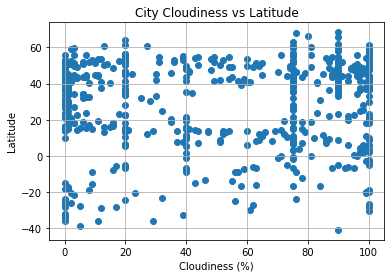

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current cloudiness.


In [209]:
plt.scatter(weather_data.cld,weather_data.lat)
plt.title('City Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current cloudiness.")

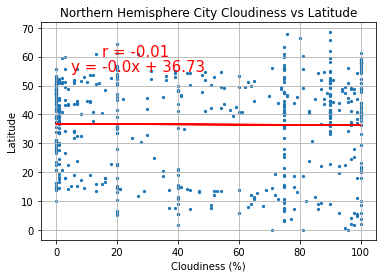

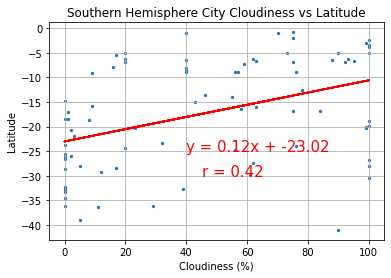

In [211]:
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.cld,n_hemi.lat)
reg_line = slope*n_hemi.cld + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.cld,reg_line,color='r')
plt.annotate(eq_line,(5,55),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(15,60),color='r',fontsize=15)

plt.scatter(n_hemi.cld,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.cld,s_hemi.lat)
reg_line = slope*s_hemi.cld + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.cld,reg_line,color='r')
plt.annotate(eq_line,(40,-25),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(45,-30),color='r',fontsize=15)

plt.scatter(s_hemi.cld,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In the northern hemisphere, there is almost no correlation between cloudiness and distance to the equator (r = 0.01). of note, however, is that on the southern hemisphere the r value is much higher, at r>0.40, although still not high enough to say there is a decent correlation.

## Wind Speed

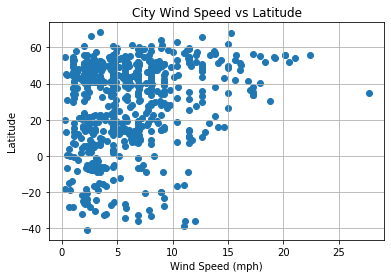

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current Wind Speed.


In [212]:
plt.scatter(weather_data.wnd,weather_data.lat)
plt.title('City Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current Wind Speed.")

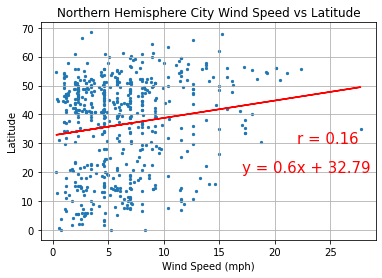

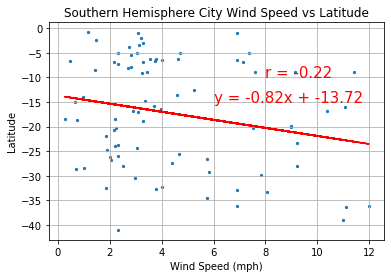

In [216]:
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.wnd,n_hemi.lat)
reg_line = slope*n_hemi.wnd + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.wnd,reg_line,color='r')
plt.annotate(eq_line,(17,20),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(22,30),color='r',fontsize=15)

plt.scatter(n_hemi.wnd,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.wnd,s_hemi.lat)
reg_line = slope*s_hemi.wnd + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.wnd,reg_line,color='r')
plt.annotate(eq_line,(6,-15),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(8,-10),color='r',fontsize=15)

plt.scatter(s_hemi.wnd,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In both hemispheres, wind speed does not seem to be affected by distance to the equator as both r values are low (r < 0.25). As such, Latitude is not a good indicator of wind speed, and vice versa.